Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


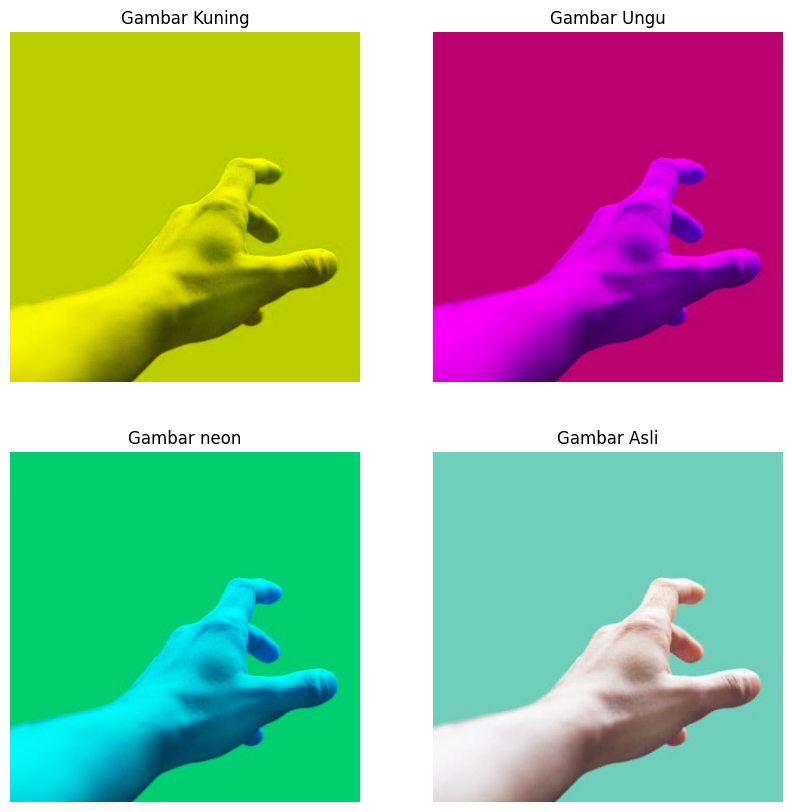

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/PCD/panangan.jpg'
image = cv2.imread(image_path)

image_gbr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
R,G,B = cv2.split(image)
zeros=np.zeros(image.shape[:2],dtype='uint8')
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
yellow_image = cv2.merge([R,G,zeros])
plt.imshow(yellow_image)
plt.title('Gambar Kuning')
plt.axis('off')

plt.subplot(2,2,2)
purple_image = cv2.merge([R,zeros,B])
plt.imshow(purple_image)
plt.title('Gambar Ungu')
plt.axis('off')

plt.subplot(2,2,3)
neon_image = cv2.merge([zeros,G,B])
plt.imshow(neon_image)
plt.title('Gambar neon')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(image_gbr)
plt.title('Gambar Asli')
plt.axis('off')

plt.show()


<ipython-input-5-faa772249fed>:26: RuntimeWarning: divide by zero encountered in log
  log_mapped = c * (np.log(channel + 1))
<ipython-input-5-faa772249fed>:27: RuntimeWarning: invalid value encountered in cast
  return np.array(log_mapped, dtype=np.uint8)


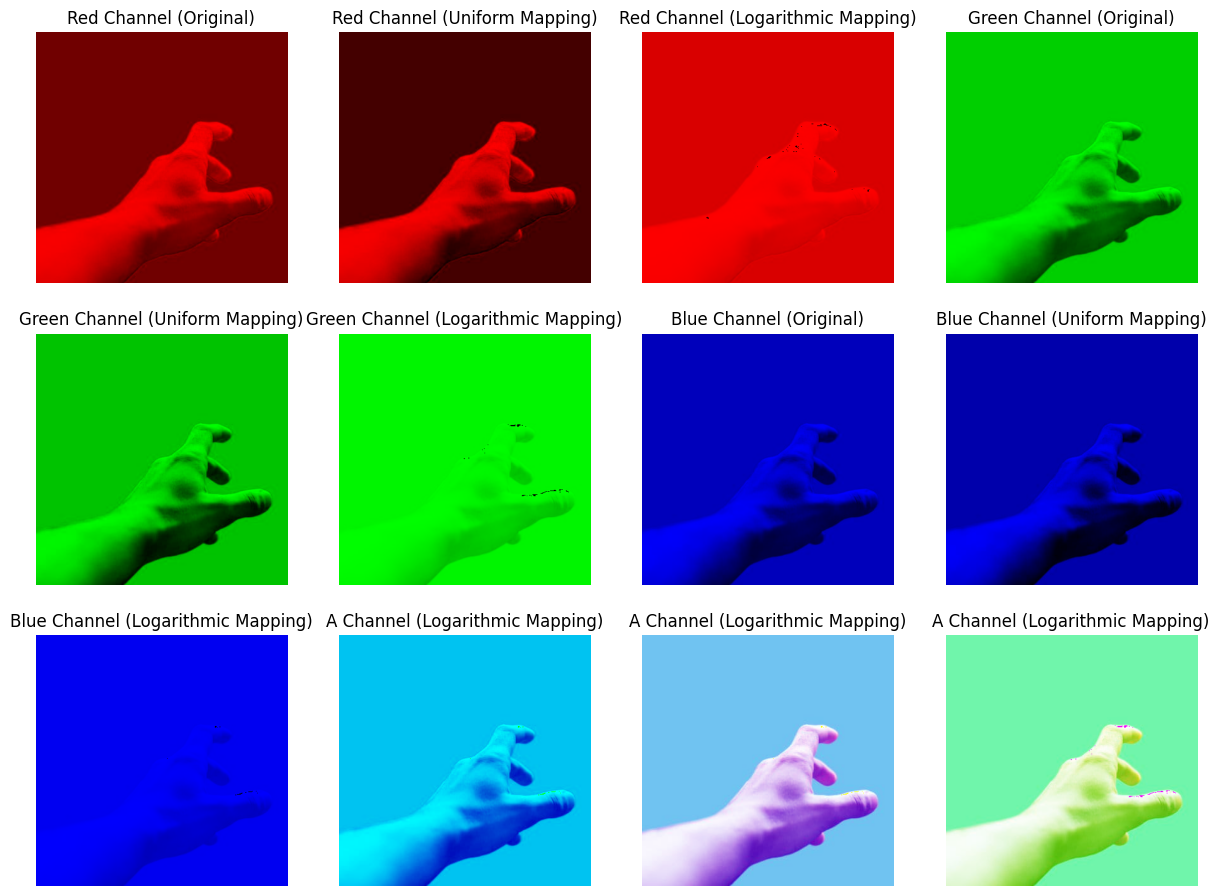

In [5]:
#Uniform Mapping dan Logarithmic Mapping
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Step 1: Load an image (Replace the path with the actual image file path)
image_path = '/content/drive/MyDrive/PCD/panangan.jpg'  # Ganti dengan path gambar Anda
image = cv2.imread(image_path)

# Step 2: Convert the image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Split the image into its Red, Green, and Blue channels
R, G, B = cv2.split(image_rgb)

# Step 4: Create a zero matrix to help in visualization
zeros = np.zeros(image.shape[:2], dtype="uint8")

# Uniform Mapping (Normalize intensity between 0 and 255)
def uniform_mapping(channel):
    return cv2.normalize(channel, None, 0, 255, cv2.NORM_MINMAX)

# Logarithmic Mapping
def logarithmic_mapping(channel):
    c = 255 / np.log(1 + np.max(channel))
    log_mapped = c * (np.log(channel + 1))
    return np.array(log_mapped, dtype=np.uint8)

# Step 5: Apply Uniform and Logarithmic Mapping to each channel
R_uniform = uniform_mapping(R)
G_uniform = uniform_mapping(G)
B_uniform = uniform_mapping(B)

R_log = logarithmic_mapping(R)
G_log = logarithmic_mapping(G)
B_log = logarithmic_mapping(B)

# Step 6: Visualize the R, G, B channels separately and with Uniform/Logarithmic mappings
plt.figure(figsize=(15, 15))

# Original Red channel
plt.subplot(4, 4, 1)
red_image = cv2.merge([R, zeros, zeros])  # R channel with G, B as 0
plt.imshow(red_image)
plt.title('Red Channel (Original)')
plt.axis('off')

# Uniform Red
plt.subplot(4, 4, 2)
uniform_red_image = cv2.merge([R_uniform, zeros, zeros])
plt.imshow(uniform_red_image)
plt.title('Red Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Red
plt.subplot(4, 4, 3)
log_red_image = cv2.merge([R_log, zeros, zeros])
plt.imshow(log_red_image)
plt.title('Red Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Green channel
plt.subplot(4, 4, 4)
green_image = cv2.merge([zeros, G, zeros])  # G channel with R, B as 0
plt.imshow(green_image)
plt.title('Green Channel (Original)')
plt.axis('off')

# Uniform Green
plt.subplot(4, 4, 5)
uniform_green_image = cv2.merge([zeros, G_uniform, zeros])
plt.imshow(uniform_green_image)
plt.title('Green Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Green
plt.subplot(4, 4, 6)
log_green_image = cv2.merge([zeros, G_log, zeros])
plt.imshow(log_green_image)
plt.title('Green Channel (Logarithmic Mapping)')
plt.axis('off')

# Original Blue channel
plt.subplot(4, 4, 7)
blue_image = cv2.merge([zeros, zeros, B])  # B channel with R, G as 0
plt.imshow(blue_image)
plt.title('Blue Channel (Original)')
plt.axis('off')

# Uniform Blue
plt.subplot(4, 4, 8)
uniform_blue_image = cv2.merge([zeros, zeros, B_uniform])
plt.imshow(uniform_blue_image)
plt.title('Blue Channel (Uniform Mapping)')
plt.axis('off')

# Logarithmic Blue
plt.subplot(4, 4, 9)
log_blue_image = cv2.merge([zeros, zeros, B_log])
plt.imshow(log_blue_image)
plt.title('Blue Channel (Logarithmic Mapping)')
plt.axis('off')


plt.subplot(4, 4, 10)
log_a_image = cv2.merge([zeros, G_uniform, B_log])
plt.imshow(log_a_image)
plt.title('A Channel (Logarithmic Mapping)')
plt.axis('off')

plt.subplot(4, 4, 11)
log_a_image = cv2.merge([R, G_uniform, B_log])
plt.imshow(log_a_image)
plt.title('A Channel (Logarithmic Mapping)')
plt.axis('off')

plt.subplot(4, 4, 12)
log_a_image = cv2.merge([R, G_log, B_uniform])
plt.imshow(log_a_image)
plt.title('A Channel (Logarithmic Mapping)')
plt.axis('off')


plt.show()
